In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')
df = df.dropna()
y = df.iloc[:, 7]
y=y.astype('int')
x = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
x.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)
x
for i in range(5547):
    if( type(x.iloc[i,1]) != type(float(0))):
        z = x.iloc[i,1][:2]
        x.iloc[i,1] = int(z)
        if(x.iloc[i,1] == 0):
            x.iloc[i,1] = 1
    else:
        x.iloc[i,1] = 1
selector = SelectKBest(f_classif, k=20)
x = selector.fit_transform(x, y)
z = 0



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2094 2095] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [21]:
x=x.astype('int')

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
QDA_model_default = QuadraticDiscriminantAnalysis()
QDA_model_default.fit(x_train, y_train)
y_pred=QDA_model_default.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

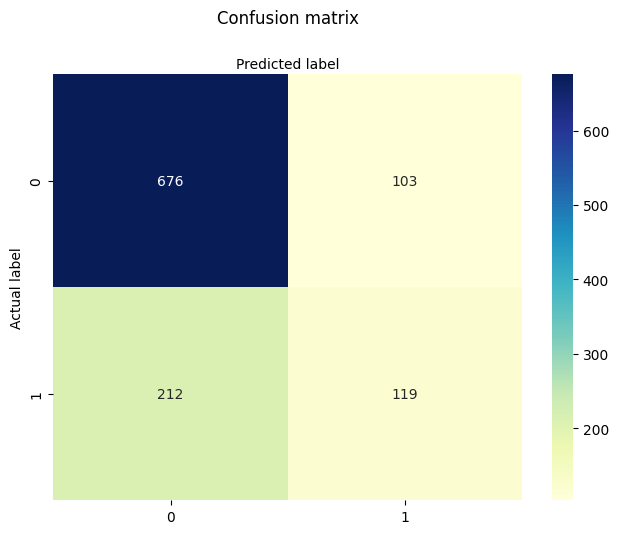

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import classification_report
print("Testing Accuracy")
target_names = ['doesn\'t die', 'dies']
print(classification_report(y_test, y_pred, target_names=target_names))
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, y_pred)

Testing Accuracy
              precision    recall  f1-score   support

 doesn't die       0.76      0.87      0.81       779
        dies       0.54      0.36      0.43       331

    accuracy                           0.72      1110
   macro avg       0.65      0.61      0.62      1110
weighted avg       0.69      0.72      0.70      1110



0.7162162162162162

In [28]:
y_pred_train= QDA_model_default.predict(x_train)
print("Training Accuracy")
accuracy_score(y_pred_train, y_train)

Training Accuracy


0.7074599954924499